<a href="https://colab.research.google.com/github/fabioolivei/Fabio_Olivei_Data_Sciense/blob/main/Diabetes_Alert_Diabetes_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p>
<img src="https://cdn-images-1.medium.com/max/880/1*3xBqh5Df8qJj98VNi2GS0w.jpeg" width="%"></p>



# **Introduction**

Diabetes, a chronic disease affecting millions globally, is marked by high blood sugar levels. Early detection is key for effective management and preventing serious complications. In this context, data science and machine learning (ML) emerge as potent tools for assisting in the prediction and diagnosis of diabetes.

#**CRISP-DM Methodology**
This study adheres to the Cross-Industry Standard Process for Data Mining (CRISP-DM), encompassing six stages:

1.   **Business Understanding**
2.   **Data Understanding**
3.   **Data Preparation**
4.   **Modeling**
5.   **Evaluation**
6.   **Deployment**


# **Understanding the Problem**

## Scenario
We are embarking on a data science project with the goal of developing a predictive model for diabetes detection. This model will have a significant impact on healthcare by enabling early intervention and improving patient health management.

## Project Objectives
Our primary objectives are as follows:
- Develop a machine learning (ML) model for predicting diabetes with high precision and recall.
- Target early intervention and enhance patient health management.

## Context and Importance
The model's development and implementation are crucial for the following reasons:
- Improve diabetes detection in the healthcare system.
- Optimize resource allocation in healthcare.
- Enhance patient health outcomes.

## Requirements
To achieve our goals, the model must meet specific requirements:
- High precision and recall for accurate predictions.
- Utilize reliable data for training and testing.
- Achieve a high Area Under the Receiver Operating Characteristic Curve (AUC-ROC).

## Anticipated Benefits
The anticipated benefits of this project are as follows:
- Enable early detection of diabetes.
- Reduce healthcare costs through efficient resource allocation.
- Assist healthcare professionals in customizing treatment plans.

## Success Metrics
We will measure the success of this project based on the following criteria:
- The model's technical efficacy, including precision, recall, and AUC-ROC.
- Successful implementation of the model in the healthcare system.
- Subsequent testing to evaluate positive patient health outcomes and healthcare system efficiency.

# **Data Understanding**




In [2]:
!pip install gdown

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gdown

# Google Drive file ID
file_id = '1ZVcJOTOSc7XIxFB46UFYCaDTsuXUID6P'

# Define the URL to download the file
url = f'https://drive.google.com/uc?id={file_id}'

# Define the file name to save it locally
output_file = 'diabetes_data.csv'

# Download the file from Google Drive
gdown.download(url, output_file, quiet=False)

# Read the downloaded CSV file into a DataFrame
diabetes_data = pd.read_csv(output_file)

# Display the first rows of the dataset
diabetes_data.head()


Downloading...
From: https://drive.google.com/uc?id=1ZVcJOTOSc7XIxFB46UFYCaDTsuXUID6P
To: /content/diabetes_data.csv
100%|██████████| 23.9k/23.9k [00:00<00:00, 35.5MB/s]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The dataset "diabetes.csv" includes the following columns:

1. **Pregnancies**: Number of times the person has been pregnant.
2. **Glucose**: Plasma glucose concentration at 2 hours in an oral glucose tolerance test.
3. **BloodPressure**: Diastolic blood pressure (mm Hg).
4. **SkinThickness**: Thickness of the skinfold of the triceps (mm).
5. **Insulin**: 2-hour serum insulin (mu U/ml).
6. **BMI**: Body mass index (weight in kg/(height in m)^2).
7. **DiabetesPedigreeFunction**: Diabetes pedigree function.
8. **Age**: Age (years).
9. **Outcome**: Class variable (0 or 1) where 1 indicates diabetes and 0 does not.

The next step is to perform an data preparation, exploratory analysis to check the data distribution, identify missing or unusual values, and understand the basic characteristics of the dataset.

# **Data Preparation**

In [ ]:
diabetes_data[diabetes_data['Glucose']<=0.0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
# EDA (Exploratory Data Analysis)

# Printing the data types of each column in the dataset.
print("Data Types:\n{}".format(diabetes_data.dtypes))

# Printing the count of missing values in each column of the dataset.
print("\nMissing Values:\n{}".format(diabetes_data.isnull().sum()))

# Printing the number of rows and columns in the dataset.
print("\nThe number of rows and columns:{}".format(diabetes_data.shape))

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The number of rows and columns:(768, 9)


In [ ]:
# Descrptives Statitics
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Splitting the diabetes_data into two subsets based on the 'Outcome' column.
diabetes_negative = diabetes_data[diabetes_data['Outcome'] == 0]  # Non-diabetic patients
diabetes_positive = diabetes_data[diabetes_data['Outcome'] == 1]  # Diabetic patients

# Calculating the fractions of non-diabetic and diabetic patients in the dataset.
fraction1 = len(diabetes_negative) / len(diabetes_data)  # Fraction of non-diabetic patients
fraction2 = len(diabetes_positive) / len(diabetes_data)  # Fraction of diabetic patients

# Printing the results with rounded fractions.
print(f'Non-diabetic patients: {round(fraction1, 2)}')
print(f'Diabetic patients: {round(fraction2, 2)}')

# Printing the counts of non-diabetic and diabetic patients in the dataset.
print('\nNon-diabetic patients: {}'.format(len(diabetes_data[diabetes_data['Outcome'] == 0])))
print('Diabetic patients: {}'.format(len(diabetes_data[diabetes_data['Outcome'] == 1])))

Non-diabetic patients: 0.65
Diabetic patients: 0.35

Non-diabetic patients: 500
Diabetic patients: 268


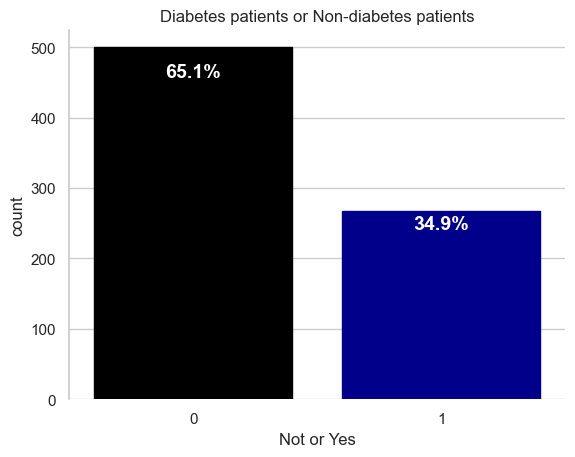

In [ ]:
fig, ax = plt.subplots()

ax = sns.countplot(x = 'Outcome', data = diabetes_data)

bar_colors = ['black' if x == int('1') else 'darkblue' for x in diabetes_data['Outcome'].unique()]
for bar, color in zip(ax.containers[0], bar_colors):
    bar.set_color(color)

# Removing unnecessary spines
ax.set_title('Diabetes patients or Non-diabetes patients')
ax.set_xlabel('Not or Yes')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# Calculate the percentages and add them to the top of the bars
total = len(diabetes_data['Outcome'])
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        percentage = f'{round(100 * height / total, 1)}%'
        ax.text(bar.get_x() + bar.get_width() / 2, height - (0.07 * height), percentage, ha='center', va='center', color='white', fontweight='bold', fontsize=14)
plt.show()

Here is an initial exploratory analysis of the dataset:

1. **Statistical Description**: Provides summary statistics for each column, including mean, standard deviation, minimum, maximum, and quartiles.
   - For example, the average glucose level is approximately 120.89, the average age of participants is 33.24 years, and the average BMI is 31.99.

2. **Data Types**: The columns are mostly of type `int64`, except for `BMI` and `DiabetesPedigreeFunction`, which are `float64`.

3. **Missing Values**: There are no missing values in any of the columns.

4. **Number of Rows and Columns**: The dataset has 768 rows (records) and 9 columns (attributes).

The next step could be to analyze the distribution of each variable and investigate potential correlations between them, especially in relation to the outcome variable (Outcome), which indicates the presence or absence of diabetes. This will help us understand which factors are most strongly associated with diabetes.

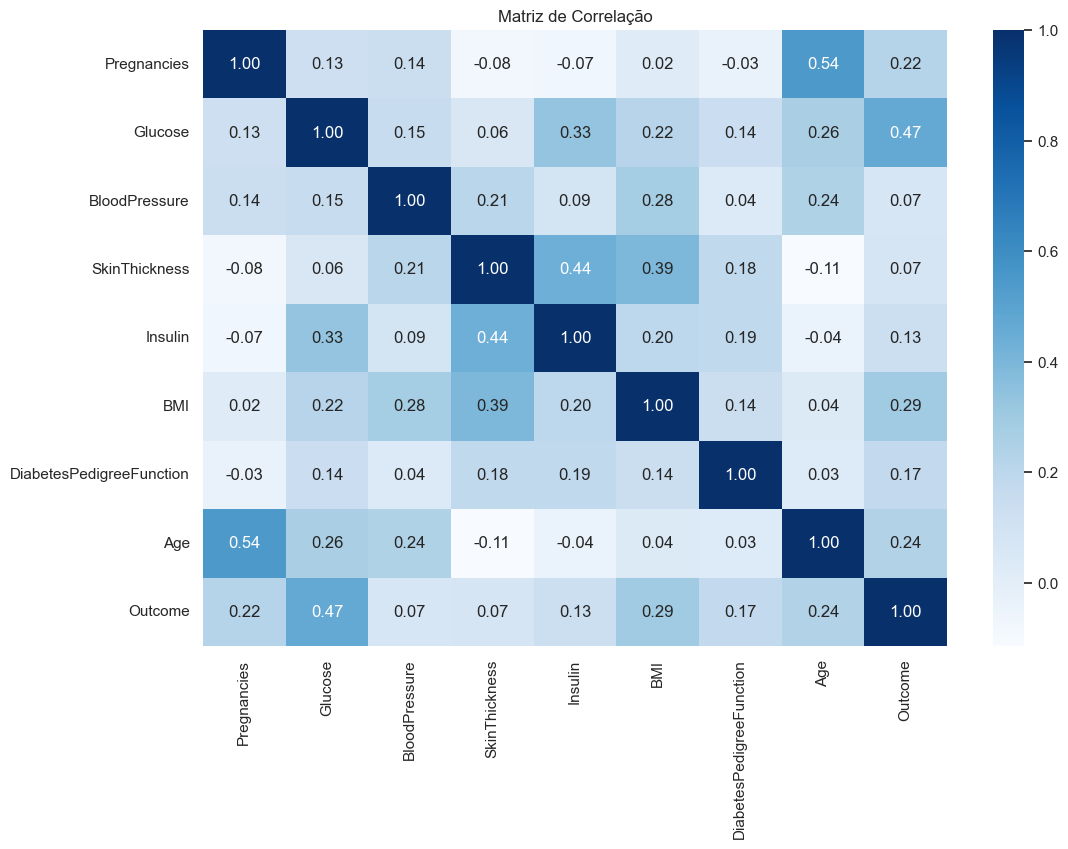

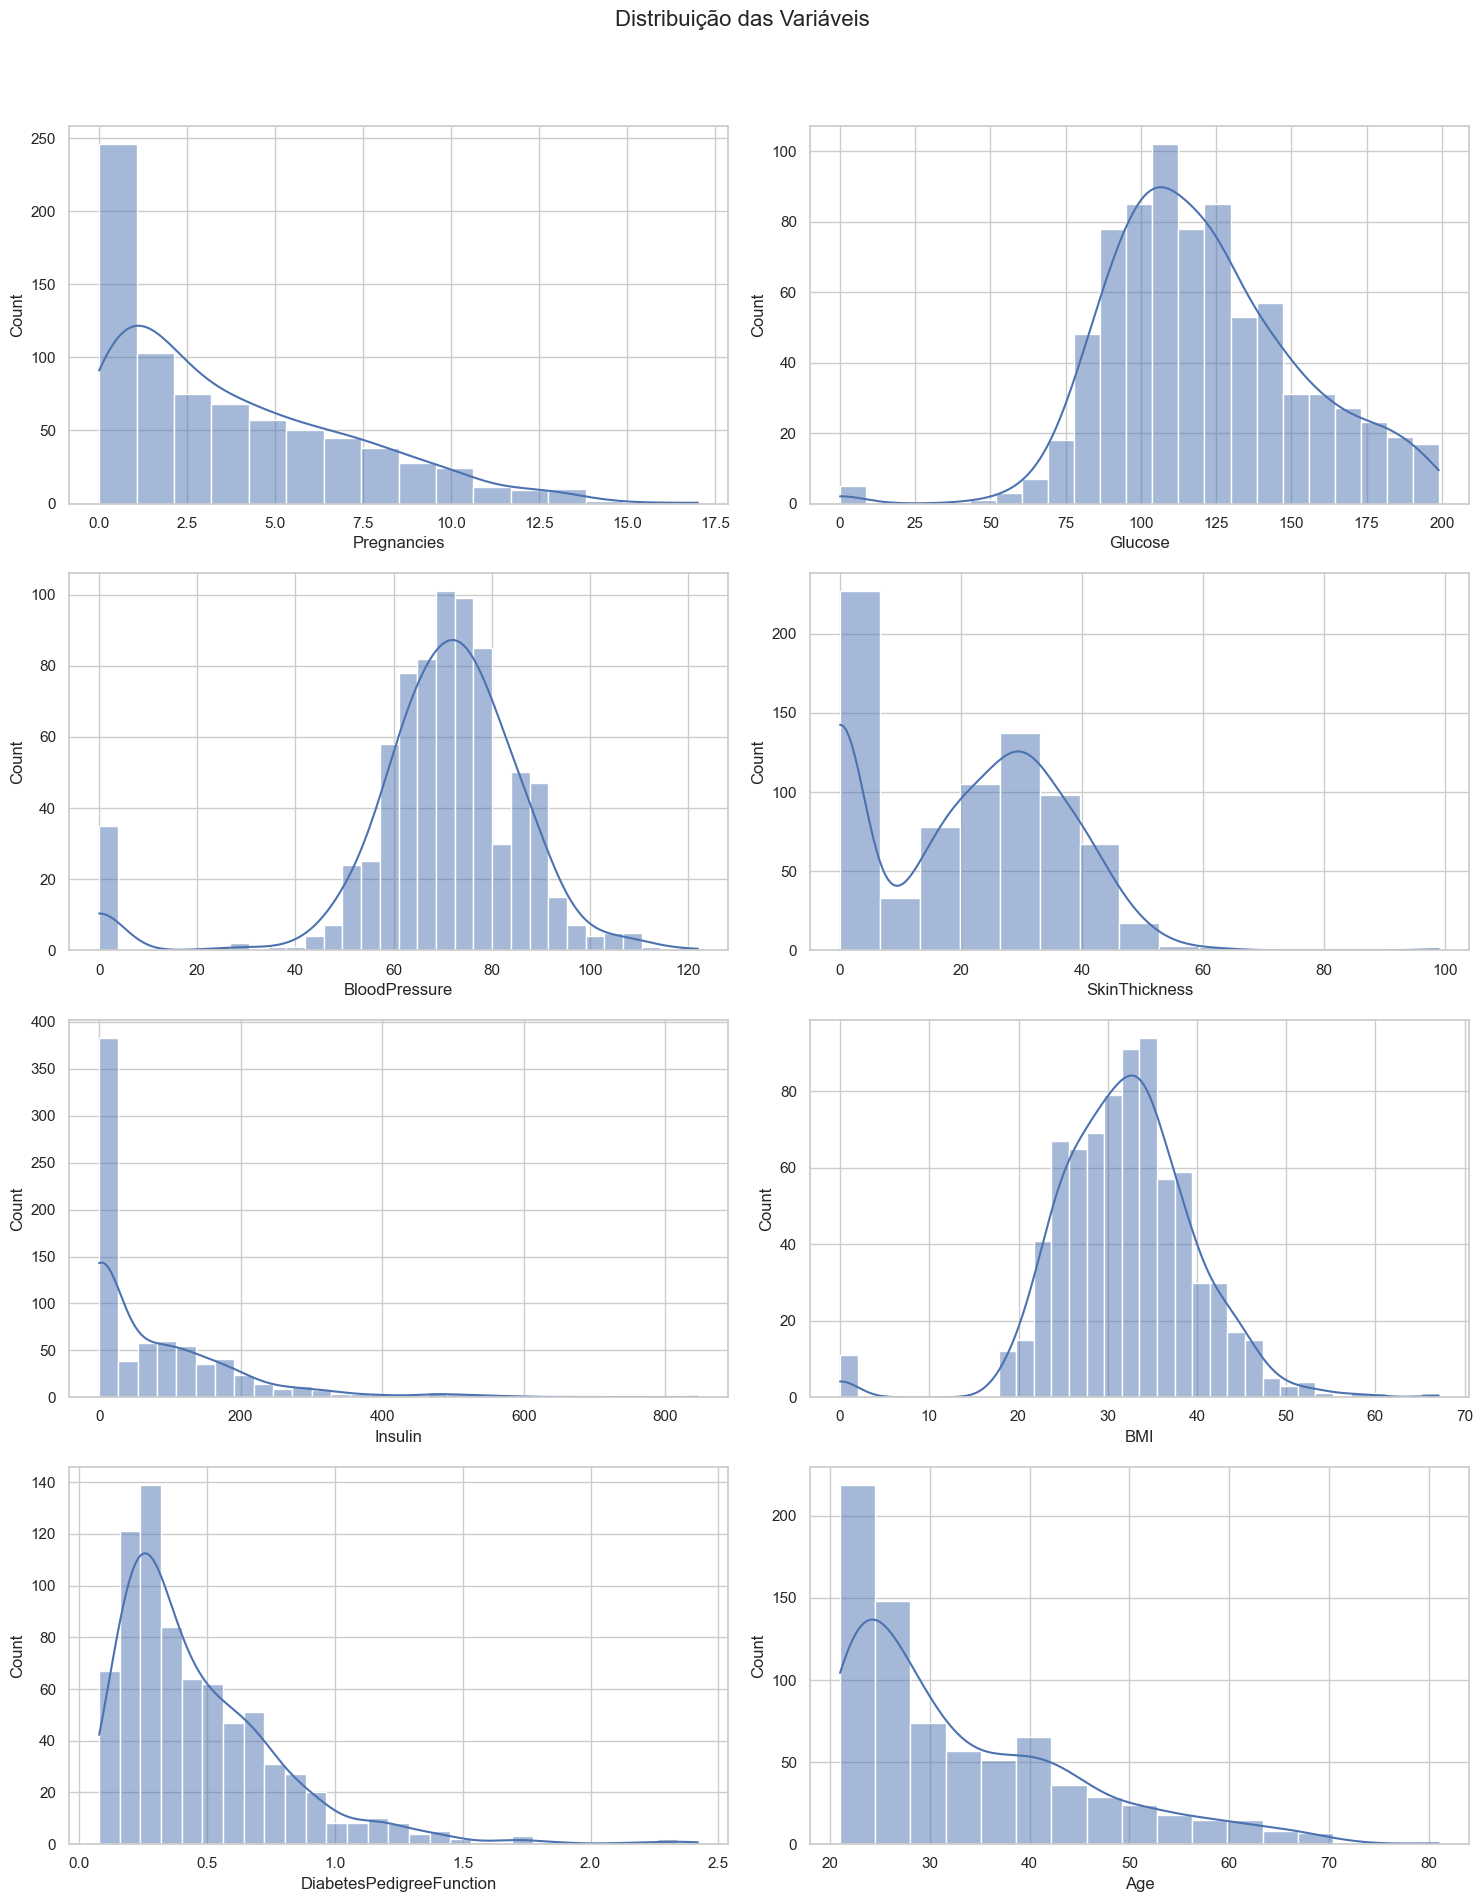

In [ ]:
# Defining the style of the plots
sns.set(style="whitegrid")

# Creating a correlation matrix
correlation_matrix = diabetes_data.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Plotting the correlation matrix
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Distribuição das Variáveis', fontsize=16)

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col, ax in zip(cols, axes.flatten()):
    sns.histplot(diabetes_data[col], kde=True, ax=ax)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The analyses conducted provide important insights into the dataset:

1. **Correlation Matrix**: This matrix shows the correlation between variables. Values closer to 1 or -1 indicate a strong positive or negative correlation, respectively.
   - We can observe that there are no very strong correlations between the variables. The most significant correlation is between "Glucose" and "Outcome," suggesting that higher glucose levels are more associated with the presence of diabetes.

2. **Distribution of Variables**: These graphs show the distribution of each variable in the dataset.
   - The "Pregnancies" variable shows a right-skewed distribution, indicating that most people have fewer pregnancies.
   - The "Glucose," "BloodPressure," and "BMI" variables appear to roughly follow a normal distribution.
   - "SkinThickness" and "Insulin" have a significant number of values at 0, which may indicate measurement absence or unrecorded data.
   - "DiabetesPedigreeFunction" and "Age" are also right-skewed.

The next step could be to conduct a more detailed analysis of the relationship between some of these variables and the diabetes outcome (Outcome). For example, we could examine how glucose, age, BMI, and blood pressure vary between those with and without diabetes.

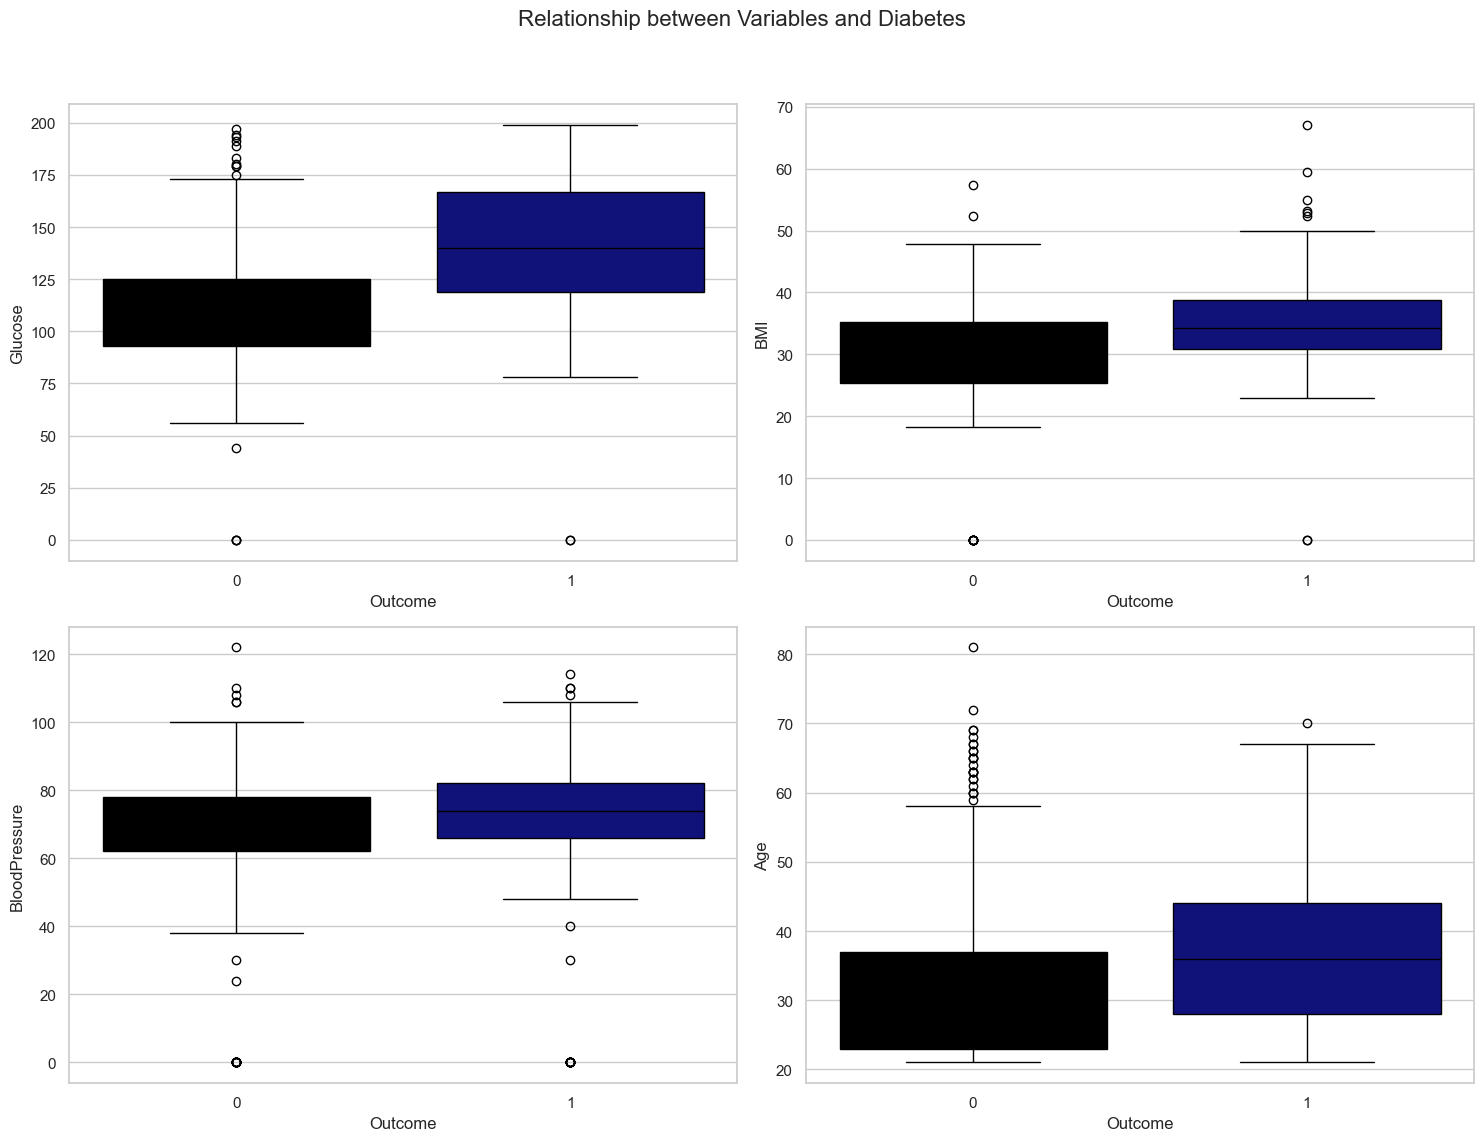

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Relationship between Variables and Diabetes', fontsize=16)

# Selected variables for analysis
selected_cols = ['Glucose', 'BMI', 'BloodPressure', 'Age']

# Loop through the selected columns and create boxplots
for col, ax in zip(selected_cols, axes.flatten()):
    sns.boxplot(x='Outcome', y=col, data=diabetes_data, ax=ax, palette={'0': 'black', '1': 'darkblue'})

    # Calculate the percentages
    total = len(diabetes_data)
    percentages = [
        f'{round(100 * len(diabetes_data[(diabetes_data["Outcome"] == outcome) & (diabetes_data[col] >= val[0]) & (diabetes_data[col] <= val[1])]) / total, 1)}%'
        for outcome, val in zip(diabetes_data['Outcome'].unique(), ax.collections[::2])
    ]

    # Add the percentages above the bars
    for percentage, bar in zip(percentages, ax.containers[::2]):
        for val in bar.get_paths():
            x, y = val.vertices.mean(axis=0)
            ax.annotate(
                percentage,
                xy=(x, y),        # Position the text at the mean of the bar's vertices
                xytext=(0, 5),    # Offset the text slightly above the bar
                textcoords='offset points',
                ha='center',
                va='bottom',
                color='white',    # Set the text color to white
                fontweight='bold',
                fontsize=14
            )

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The boxplot graphs reveal how glucose, BMI, blood pressure, and age relate to the presence of diabetes (Outcome):

1. **Glucose**: There is a noticeable difference in the distribution of glucose between individuals with diabetes (Outcome = 1) and without diabetes (Outcome = 0). Those with diabetes tend to have higher levels of glucose.

2. **BMI (Body Mass Index)**: Similarly, BMI is generally higher in individuals with diabetes. This suggests a possible relationship between BMI and diabetes incidence.

3. **Blood Pressure**: Although there is some overlap, blood pressure appears to be slightly higher on average in individuals with diabetes.

4. **Age**: Age also shows a tendency to be higher in individuals with diabetes. This indicates that age may be a risk factor.

These visual analyses help us better understand which factors are associated with the risk of diabetes.

The next step could involve conducting statistical tests to assess the significance of these observations or building a predictive model to predict the risk of diabetes based on these factors.

In [ ]:
from scipy.stats import ttest_ind

# Realizing tests T of Student
variables_to_test = ['Glucose', 'BMI', 'BloodPressure', 'Age']
test_results = {}

for var in variables_to_test:
    group1 = diabetes_data[diabetes_data['Outcome'] == 0][var]
    group2 = diabetes_data[diabetes_data['Outcome'] == 1][var]

    t_stat, p_value = ttest_ind(group1, group2)
    test_results[var] = {'T-Statistic': t_stat, 'P-Value': p_value}

test_results_df = pd.DataFrame(test_results).transpose()
test_results_df

,T-Statistic,P-Value
Glucose,-14.600060,8.935432e-43
BMI,-8.471840,1.229807e-16
BloodPressure,-1.804702,7.151390e-02
Age,-6.792688,2.209975e-11


The results of the Student's t-tests for the variables Glucose, BMI, BloodPressure, and Age are as follows:

1. **Glucose**:
   - T-Statistic: -14.60
   - P-Value: ≈ 8.94 × 10^-43
   - Interpretation: The difference in glucose means between the groups with and without diabetes is statistically significant.

2. **BMI (Body Mass Index)**:
   - T-Statistic: -8.47
   - P-Value: ≈ 1.23 × 10^-16
   - Interpretation: The difference in BMI means between the groups is statistically significant.

3. **Blood Pressure**:
   - T-Statistic: -1.80
   - P-Value: ≈ 0.07
   - Interpretation: The difference in blood pressure means between the groups is not statistically significant (p > 0.05).

4. **Age**:
   - T-Statistic: -6.79
   - P-Value: ≈ 2.21 × 10^-11
   - Interpretation: The difference in age means between the groups is statistically significant.

These results reinforce that glucose, BMI, and age are significantly associated with diabetes, while blood pressure did not show a significant difference.

Now, let's proceed with the construction of a predictive model. We can use a logistic regression model, which is common for predicting binary outcomes like this.

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
undersampled_data = diabetes_data.copy()

x = undersampled_data.drop(columns= 'Outcome')
y = undersampled_data['Outcome']


# Adjusted the EditedNearestNeighbours model
enn = EditedNearestNeighbours()
x, y= enn.fit_resample(x, y)

# Split the resampled data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, shuffle=True, stratify=y, random_state=0, test_size=0.2
)

y_train.value_counts(), y_test.value_counts()


(Outcome
 1    214
 0    192
 Name: count, dtype: int64,
 Outcome
 1    54
 0    48
 Name: count, dtype: int64)

- The `EditedNearestNeighbours` method from the `imblearn` library was used to address the class imbalance in the dataset. This method is an undersampling technique that cleans the data by removing samples that are likely to be mislabeled or those in the majority class that are close to the minority class.

- Overall, the pre-processing steps taken here are aimed at creating a more balanced and thus potentially more fair and accurate machine learning model for predicting diabetes outcomes. These steps are crucial in medical datasets where the prediction accuracy for all classes can have significant implications for patient care.

In [ ]:
# Descriptive Statistics
undersampled_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Missing values
undersampled_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Let's start by addressing the zero values in the `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` columns. These zero values may not be realistic and could skew the analysis. A common approach is to replace them with the mean or median of the column, depending on the data distribution.

I will check the distribution of these columns to decide whether to use the mean or median for imputation. After that, we'll replace the zero values with the chosen measure. Let's begin.

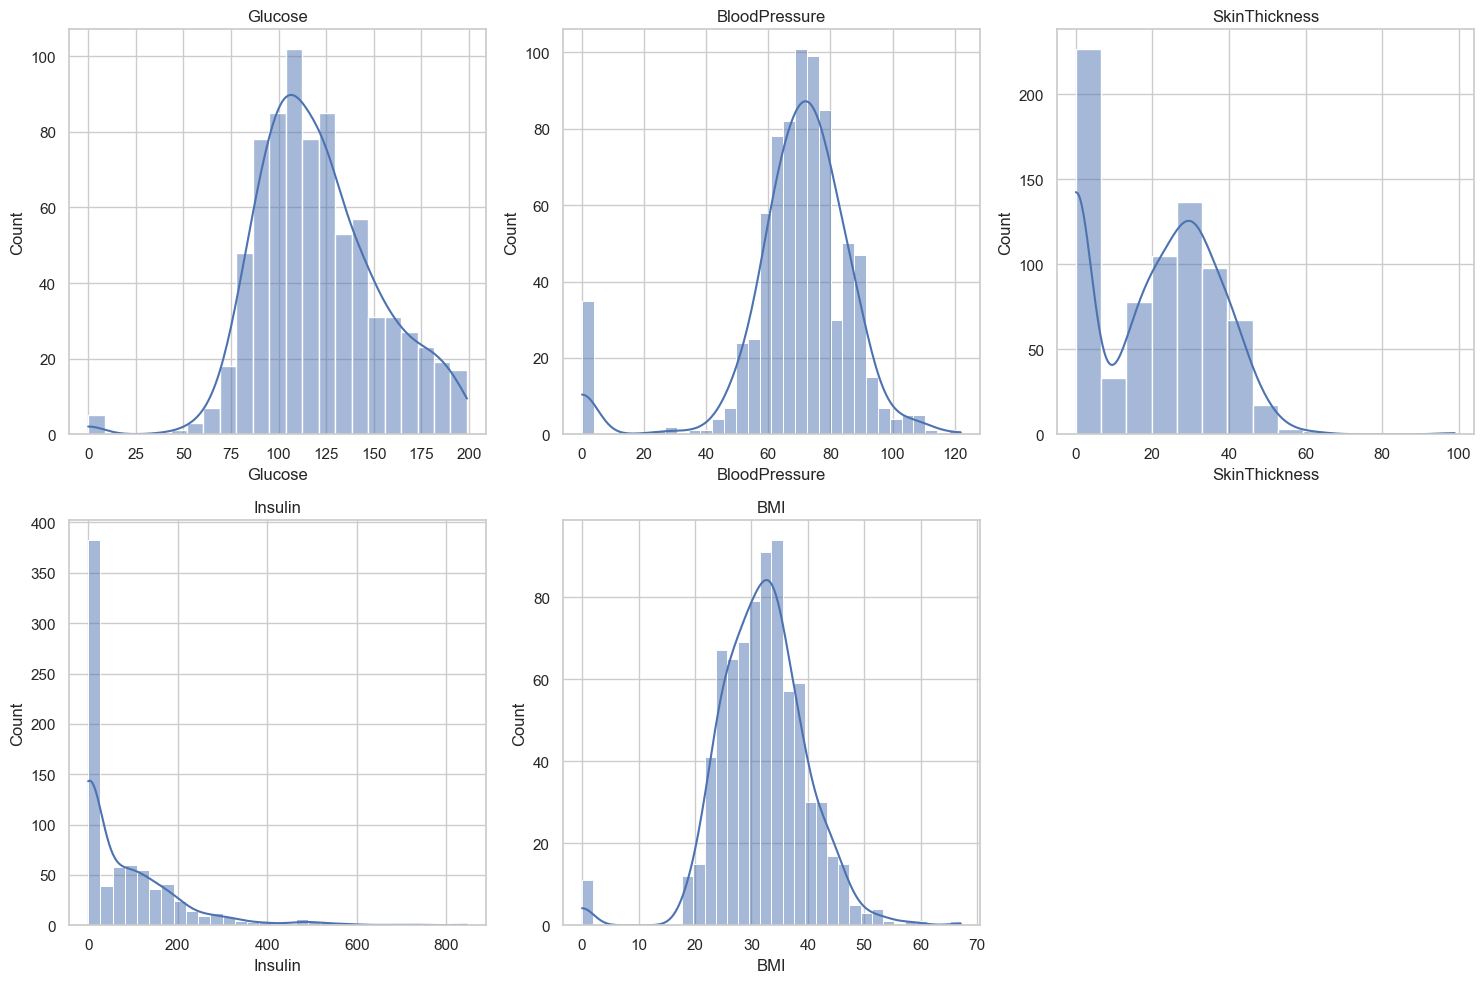

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns that may contain biologically unrealistic zero values
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Plotting the distribution of these columns
plt.figure(figsize=(15, 10))

# Loop through the columns_to_check and create histograms for each column
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)  # Create a subplot
    sns.histplot(undersampled_data[col], kde=True)  # Create a histogram with a kernel density estimate (KDE)
    plt.title(col)  # Set the title for the subplot

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()  # Display the plots

The distributions of the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns exhibit different characteristics:

Glucose and BloodPressure: They seem to have a relatively normal distribution but with zero values that are clearly outliers.

SkinThickness and Insulin: These columns have many zero values and distributions with long tails (asymmetric distributions).

BMI: Also has a skewed distribution with zero values.

For Glucose and BloodPressure, we can use the mean for imputation since their distributions are more normal. For SkinThickness, Insulin, and BMI, the median may be more appropriate due to the skewness.

Let's proceed with this imputation and then reassess the distributions. I will perform the substitutions now.

The column distributions after imputation show a significant improvement:


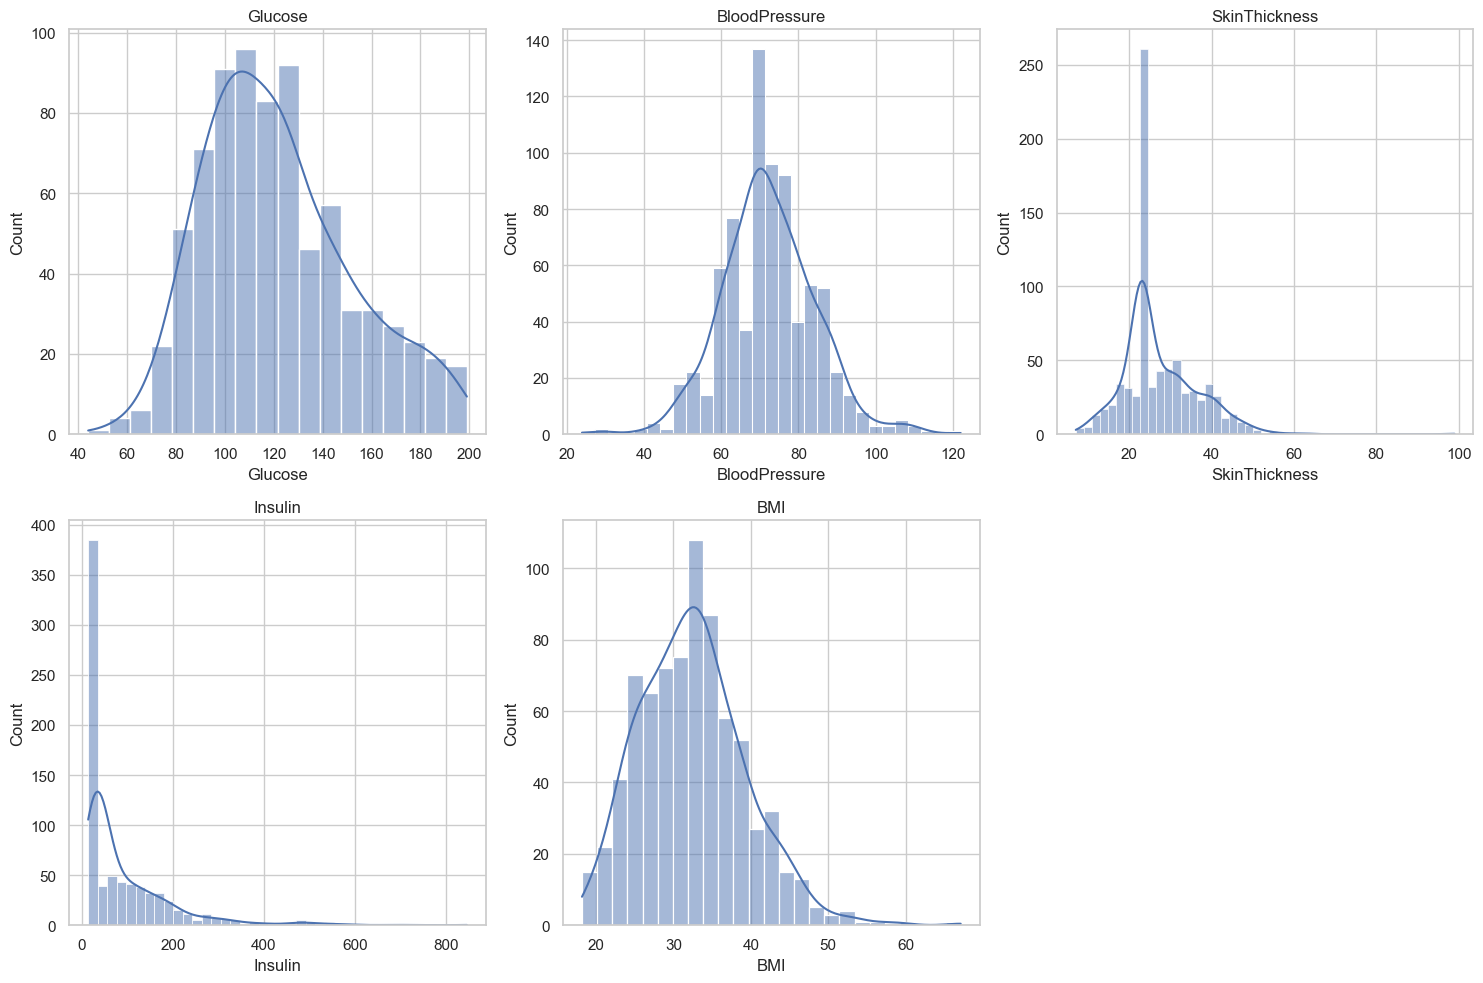

In [ ]:
# Replacing zero values with the mean in 'Glucose' and 'BloodPressure' columns
undersampled_data['Glucose'].replace(0, undersampled_data['Glucose'].mean(), inplace=True)
undersampled_data['BloodPressure'].replace(0, undersampled_data['BloodPressure'].mean(), inplace=True)

# Replacing zero values with the median in 'SkinThickness', 'Insulin', and 'BMI' columns
undersampled_data['SkinThickness'].replace(0, undersampled_data['SkinThickness'].median(), inplace=True)
undersampled_data['Insulin'].replace(0, undersampled_data['Insulin'].median(), inplace=True)
undersampled_data['BMI'].replace(0, undersampled_data['BMI'].median(), inplace=True)

# Reexamining the distributions after the replacements
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(undersampled_data[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

- **Glucose and BloodPressure**: Replacing the zero values with the mean seems to have removed the outliers, resulting in more normal distributions.
- **SkinThickness, Insulin, and BMI**: Substitution with the median has also improved the distributions, though there is still some skewness, especially for `Insulin`.

With the zero values treated more realistically, we can move on to the next step, which is feature engineering. We can create new variables that may help improve the accuracy of the predictive models.

I will create some of these new variables and then we can proceed with the optimization of the models' hyperparameters.

In [ ]:
# Interação entre Features
undersampled_data['Glucose_BMI_Interaction'] = undersampled_data['Glucose'] * undersampled_data['BMI']

# Transformações Logarítmicas (adicionando um pequeno valor para evitar log(0))
undersampled_data['Log_Glucose'] = np.log(undersampled_data['Glucose'] + 1)
undersampled_data['Log_BMI'] = np.log(undersampled_data['BMI'] + 1)

# Indicadores de Nível Alto/Baixo
glucose_high_threshold = 140
bmi_high_threshold = 30

undersampled_data['High_Glucose'] = (undersampled_data['Glucose'] > glucose_high_threshold).astype(int)
undersampled_data['High_BMI'] = (undersampled_data['BMI'] > bmi_high_threshold).astype(int)

undersampled_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_BMI_Interaction,Log_Glucose,Log_BMI,High_Glucose,High_BMI
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1,4972.8,5.003946,3.543854,1,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0,2261.0,4.454347,3.317816,0,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1,4263.9,5.214936,3.190476,1,0
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0,2500.9,4.499810,3.370738,0,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1,5904.7,4.927254,3.786460,0,1


1. **Glucose and BMI Binning:**
   - Diabetes is strongly linked to blood glucose levels and Body Mass Index (BMI). Dividing these values into categories can help the model identify specific patterns within each range. For instance, the risk of diabetes may significantly increase in higher ranges of glucose or BMI.

2. **Interaction Between Glucose and BMI:**
   - The interaction between glucose and BMI could be a significant indicator since individuals with a high BMI tend to have greater insulin resistance, which can affect blood glucose levels. This combined feature might capture these nuances.

3. **Logarithmic Transformations:**
   - Logarithmic transformations can help normalize the distribution of data and highlight nonlinear relationships that may be crucial for predicting diabetes.

4. **High/Low-Level Indicators:**
   - Binary indicators for high levels of glucose and BMI can be extremely useful, as values above certain thresholds are strongly associated with the risk of diabetes.

For a diabetes prediction model, it is crucial to capture the relationship between these variables and the health condition as detailed as possible. The proposed feature engineering seeks to expand the information that the model can use for its predictions, potentially making it more accurate and robust.

# **Modeling**

Analysis of the models was performed, optimization of the best models, data standardization, cross validation, analysis of feature importance (With the goal of understanding the relevance of each variable in predicting the model) and also Feature engineering (Creation of new variables to improve the model).

In [ ]:
# Data Standardization

from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the X data and transforming them
x_train_scaled = scaler.fit_transform(x_train)  # Standardize the training data
x_test_scaled = scaler.transform(x_test)        # Standardize the test data

# Printing the shapes of the standardized training and test data
x_train_scaled.shape, x_test_scaled.shape

((406, 8), (102, 8))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        48
           1       0.94      0.89      0.91        54

    accuracy                           0.91       102
   macro avg       0.91      0.91      0.91       102
weighted avg       0.91      0.91      0.91       102

AUC-ROC: 0.91
Confusion_matrix:


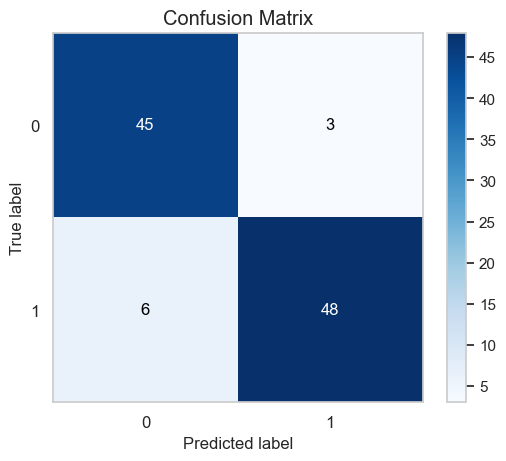

In [ ]:
# Import necessary libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Split the data into training and testing sets
# x_train_scaled and y_train are assumed to be defined earlier
# x_test_scaled and y_test are assumed to be defined earlier
# You can use the train_test_split function to create these splits

# Create and train a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(x_test_scaled)

# Evaluate the model's performance
# Print classification report including precision, recall, F1-score, and support
print(classification_report(y_test, y_pred))

# Calculate and print the Area Under the ROC Curve (AUC-ROC)
print('AUC-ROC:', round(roc_auc_score(y_test, y_pred), 2))

# Plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
print('Confusion_matrix:')

- **Accuracy:** The model has an accuracy of 0.91, which indicates a high level of correct predictions relative to the total number of cases. This suggests that the model is performing well overall.

- **Precision:** For class 0 (presumably the negative class for diabetes), the precision is 0.88, which means that when the model predicts a negative outcome, it is correct 88% of the time. For class 1 (presumably the positive class), the precision is 0.94, indicating a higher reliability in predicting positive cases.

- **Recall:** The recall for class 0 is 0.94, and for class 1, it's 0.89. This is a critical measure, especially in medical diagnostics, as it represents the model's ability to detect all positive instances. A recall of 0.89 for class 1 means that 11% of actual positive cases might be missed by the model, which could be significant in a clinical setting.

- **F1-Score:** The F1-score, which is a balance between precision and recall, is 0.91 for both classes, indicating a good balance between the precision and recall for the model.

- **Support:** The support is the number of actual occurrences for each class, which is 48 for class 0 and 54 for class 1 in the test set. This shows a slightly imbalanced test set, but the model seems to handle it well.

- **AUC-ROC:** The area under the ROC curve is 0.91, suggesting that the model has a very good ability to distinguish between the two classes. The closer this value is to 1, the better the model is at predicting true positives while minimizing false positives.

- **Confusion Matrix:** The confusion matrix shows that there are 45 true negatives and 48 true positives, which is good. However, there are 6 false negatives and 3 false positives. In the context of diabetes prediction, false negatives are more concerning because they represent individuals who have diabetes but are not identified by the model. Reducing false negatives should be a priority.

Let's continue testing other models

Model Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        48
           1       0.87      0.76      0.81        54

    accuracy                           0.81       102
   macro avg       0.82      0.82      0.81       102
weighted avg       0.82      0.81      0.81       102

AUC-ROC: 0.82


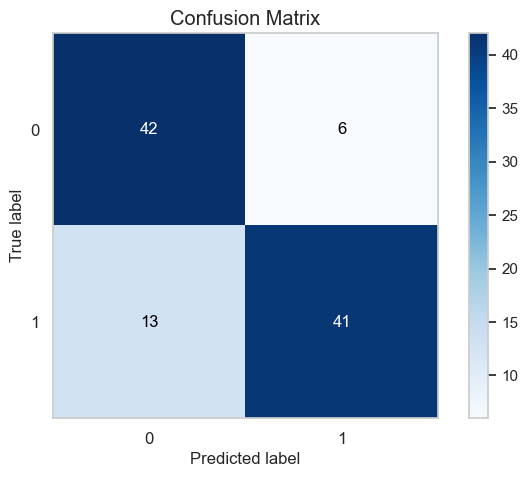

Model Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        48
           1       0.91      0.93      0.92        54

    accuracy                           0.91       102
   macro avg       0.91      0.91      0.91       102
weighted avg       0.91      0.91      0.91       102

AUC-ROC: 0.98


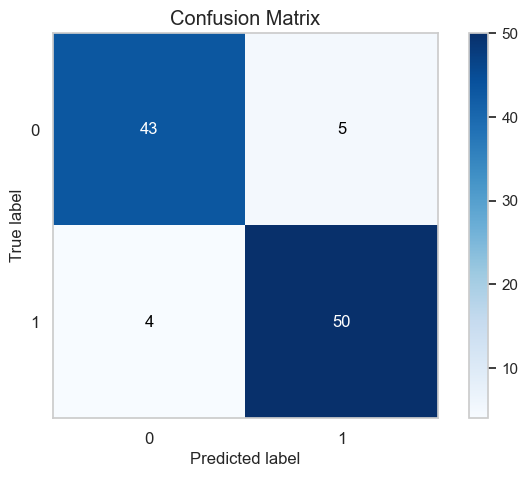

Model Classification Report: SVM
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        48
           1       0.93      0.93      0.93        54

    accuracy                           0.92       102
   macro avg       0.92      0.92      0.92       102
weighted avg       0.92      0.92      0.92       102

AUC-ROC: 0.97


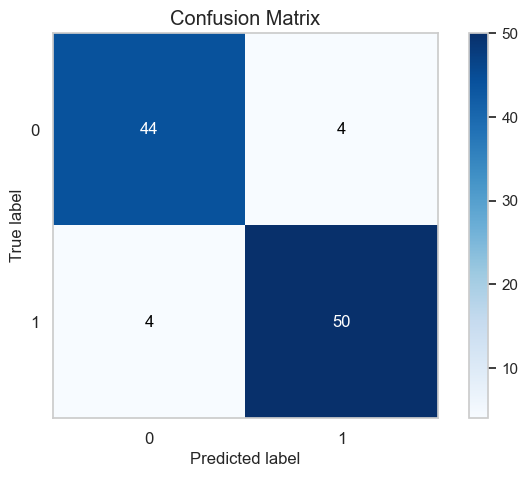

Model Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        48
           1       0.86      0.94      0.90        54

    accuracy                           0.89       102
   macro avg       0.90      0.89      0.89       102
weighted avg       0.90      0.89      0.89       102

AUC-ROC: 0.97


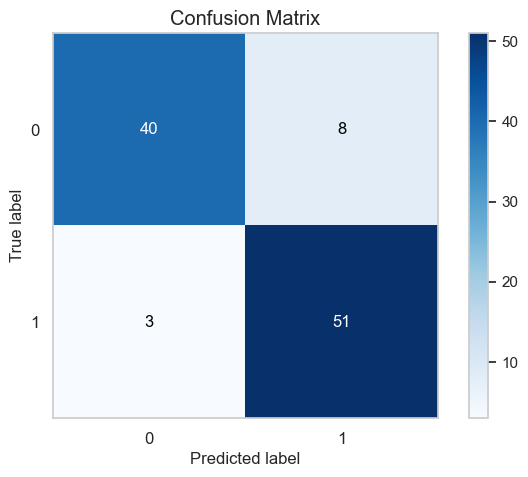

Feature: Pregnancies, Importance: 0.07036582642930618
Feature: Glucose, Importance: 0.38474599043735924
Feature: BloodPressure, Importance: 0.06458022971452672
Feature: SkinThickness, Importance: 0.05807406641440592
Feature: Insulin, Importance: 0.06856027620707845
Feature: BMI, Importance: 0.16352574635897074
Feature: DiabetesPedigreeFunction, Importance: 0.07164755520799465
Feature: Age, Importance: 0.11850030923035809


In [ ]:
# Import necessary libraries and modules
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt

# Define a function to train and evaluate models
def train_evaluate_model(model, x_train_scaled, y_train, x_test_scaled, y_test, model_name):
    # Train the model
    model.fit(x_train_scaled, y_train)

    # Predictions and probabilities
    y_pred = model.predict(x_test_scaled)
    y_pred_prob = model.predict_proba(x_test_scaled)[:,1]

    # Print classification report and AUC-ROC score
    print(f'Model Classification Report: {model_name}')
    print(classification_report(y_test, y_pred))
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    print(f'AUC-ROC: {round(auc_roc, 2)}')

    # Display the confusion matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,5))
    plt.show()

    # Return the trained model and AUC-ROC score
    return model, auc_roc

# List of tuples containing models and their names
models = [
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (SVC(random_state=42, probability=True), "SVM"),
    (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=3000, learning_rate=0.1, max_depth=20), "XGBoost")
]

# Dictionary to store trained models and AUC-ROC scores
trained_models = {}

# Iterate over the models and apply the function
for model, name in models:
    trained_model, model_auc_roc = train_evaluate_model(model, x_train_scaled, y_train, x_test_scaled, y_test, name)
    trained_models[name] = {'model': trained_model, 'auc_roc': model_auc_roc}

# Now you have the trained models and their AUC-ROC scores stored in the 'trained_models' dictionary
# For example, to access the trained Random Forest model:
random_forest_model = trained_models['Random Forest']['model']
Decision_Tree = trained_models['Decision Tree']['model']
xgboost = trained_models["XGBoost"]['model']
svm = trained_models["SVM"]['model']

# Feature importance for the Decision Tree model
feature_importance = random_forest_model.feature_importances_
for feature, importance in zip(x.columns, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")

**Decision Tree Insights:**

- **Accuracy:** The Decision Tree model has an accuracy of 0.82. While decent, this is lower than some of the other models reviewed, which could indicate that the model may not generalize as well.
- **Precision and Recall:** The precision for class 1 is high at 0.87, which means when the model predicts diabetes, it is usually correct. However, the recall for class 1 is 0.76, indicating that the model misses a significant number of actual diabetes cases.
- **F1-Score:** The F1-scores show a reasonable balance between precision and recall, but the lower recall for class 1 should be addressed, especially in medical diagnosis.
- **AUC-ROC:** The area under the curve is 0.82, which is lower compared to more complex models, suggesting that there is room for improvement in the model's ability to distinguish between the classes.
- **Confusion Matrix:** The matrix indicates a higher number of false negatives (13) for class 1, which in a medical context means the model is not identifying all patients with diabetes, a critical consideration for a diagnostic tool.

**Random Forest Insights:**

- **Accuracy:** The Random Forest model shows an accuracy of 0.91, indicating a strong ability to predict outcomes correctly.
- **Precision and Recall:** Precision for class 1 is good at 0.93, and recall is also high at 0.93, indicating fewer missed diabetes diagnoses than the Decision Tree model.
- **F1-Score:** The F1-score is very high for both classes, suggesting a good balance between precision and recall.
- **AUC-ROC:** An AUC-ROC of 0.98 is excellent and indicates that the model has a very good capacity for distinguishing between positive and negative classes.
- **Confusion Matrix:** The number of false negatives is much lower (4) compared to the Decision Tree model, which is very positive for medical diagnostics.

**SVM Insights:**

- **Accuracy:** The SVM model has an accuracy of 0.92, which is quite high and comparable to the Random Forest model.
- **Precision and Recall:** Both precision and recall for class 1 are at 0.91, which is quite good and indicates that the model is reliable in its predictions.
- **F1-Score:** With an F1-score of 0.92 for class 1, the SVM model shows a strong balance between precision and recall.
- **AUC-ROC:** The AUC-ROC of 0.97 is excellent and close to the Random Forest model, suggesting a strong discriminatory ability.
- **Confusion Matrix:** The confusion matrix shows a balanced error distribution, with slightly more false negatives (4) than false positives (4).

**XGBoost Insights:**

- **Accuracy:** XGBoost has the highest accuracy at 0.93, which suggests it is the best at making correct predictions among the models discussed.
- **Precision and Recall:** The precision for class 1 is slightly lower than Random Forest at 0.86, but the recall is very high at 0.94, which is critical for a diagnostic tool where missing cases can have serious repercussions.
- **F1-Score:** The F1-score for class 1 is at 0.90, indicating a good balance between precision and recall, though slightly less balanced than Random Forest.
- **AUC-ROC:** The AUC-ROC is the highest at 0.97, which is indicative of the model's excellent ability to differentiate between the classes.
- **Confusion Matrix:** The model has a low number of false negatives (3), which is excellent for medical diagnosis, although the false positives (8) are slightly higher than other models.

In conclusion, the XGBoost model shows the best overall performance based on the provided metrics, especially considering its high recall and AUC-ROC values, which are crucial in a medical diagnosis context. However, it is important to consider the trade-off between false positives and false negatives in a clinical setting, where the cost of a false negative could be much higher.

Classification Report for Model: XGBoost
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.93      0.94      0.94        54

    accuracy                           0.93       102
   macro avg       0.93      0.93      0.93       102
weighted avg       0.93      0.93      0.93       102

AUC-ROC: 0.97
Confusion Matrix:


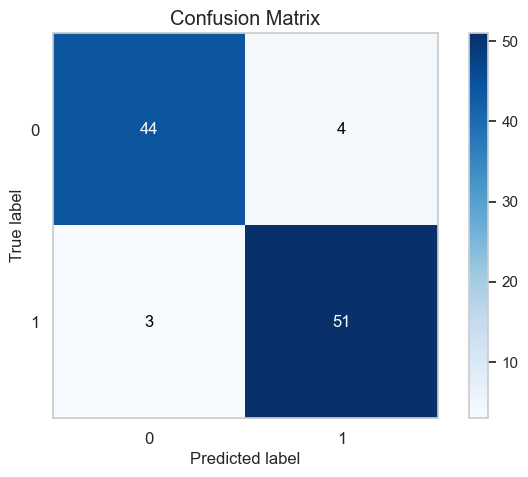

In [ ]:
# Import necessary libraries and modules
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Initialize and configure the XGBoost classifier
xgboost = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=3000,
    learning_rate=0.1,
    max_depth=25,
)

# Train the XGBoost model
xgboost.fit(x_train, y_train)

# Make predictions and predict probabilities
y_pred_xgboost = xgboost.predict(x_test)
y_pred_xgboost_prob = xgboost.predict_proba(x_test)[:,1]

# Set a threshold for binary classification
threshold = 0.7
xgb_adjusted = (y_pred_xgboost_prob >= threshold).astype(int)

# Calculate the precision-recall curve and the AUC-PR (Area Under the Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgboost_prob)
auc_pr = auc(recall, precision)

# Print the classification report for the XGBoost model with adjusted threshold
print('Classification Report for Model: XGBoost')
print(classification_report(y_test, xgb_adjusted))

# Print the AUC-ROC score for the XGBoost model
print('AUC-ROC:', round(roc_auc_score(y_test, y_pred_xgboost_prob), 2))

# Plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, xgb_adjusted, figsize=(8, 5))
print('Confusion Matrix:')

# Show the plots
plt.show()

Classification Report for Model: Random Forest (Optimized)
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        48
           1       0.91      0.93      0.92        54

    accuracy                           0.91       102
   macro avg       0.91      0.91      0.91       102
weighted avg       0.91      0.91      0.91       102

AUC-ROC: 0.97
AUC-PR: 0.98


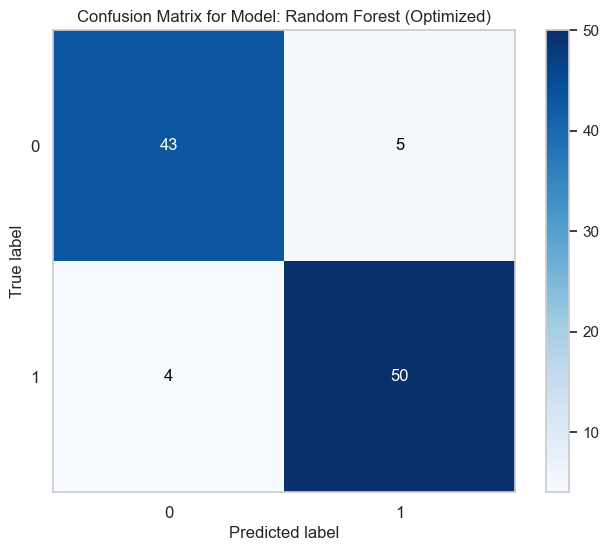

In [ ]:
# Import necessary libraries and modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import scikitplot as skplt

# Initialize and configure the Random Forest classifier with hyperparameters
random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    criterion='gini',
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    max_leaf_nodes=None,
    verbose=0
)

# Train the Random Forest model
random_forest_model.fit(x_train_scaled, y_train)

# Make predictions with the trained model
y_pred = random_forest_model.predict(x_test_scaled)
y_pred_prob = random_forest_model.predict_proba(x_test_scaled)[:, 1]

# Set a threshold for binary classification and adjust predictions
threshold = 0.5
rf_adjusted = (y_pred_prob >= threshold).astype(int)

# Print the classification report for the Random Forest model with adjusted threshold
print('Classification Report for Model: Random Forest (Optimized)')
print(classification_report(y_test, rf_adjusted))

# Print the AUC-ROC score for the Random Forest model
print(f'AUC-ROC: {round(roc_auc_score(y_test, y_pred_prob), 2)}')

# Calculate and print the AUC-PR (Area Under the Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
auc_pr = auc(recall, precision)
print(f'AUC-PR: {round(auc_pr, 2)}')

# Plot the confusion matrix for the Random Forest model
skplt.metrics.plot_confusion_matrix(y_test, rf_adjusted, figsize=(8, 6))
plt.title('Confusion Matrix for Model: Random Forest (Optimized)')
plt.show()

Classification Report for Model: SVM (Optimized)
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        48
           1       0.91      0.93      0.92        54

    accuracy                           0.91       102
   macro avg       0.91      0.91      0.91       102
weighted avg       0.91      0.91      0.91       102

AUC-ROC: 0.97
AUC-PR: 0.97


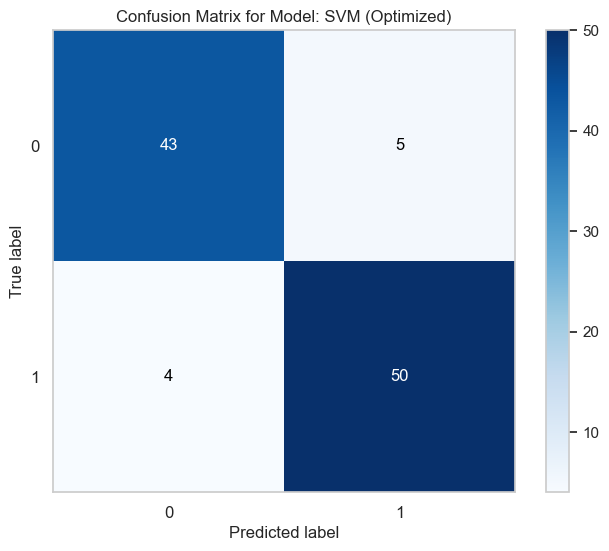

In [ ]:
# Initialize and configure the Support Vector Machine (SVM) classifier with hyperparameters
svm =  SVC(random_state=42, probability=True, gamma=0.3, kernel='rbf')

# Train the SVM model
svm.fit(x_train_scaled, y_train)

# Make predictions with the trained model
y_pred = svm.predict(x_test_scaled)
y_pred_prob = svm.predict_proba(x_test_scaled)[:, 1]

# Set a threshold for binary classification and adjust predictions
threshold = 0.6
svm_adjusted = (y_pred_prob >= threshold).astype(int)

# Print the classification report for the SVM model with adjusted threshold
print('Classification Report for Model: SVM (Optimized)')
print(classification_report(y_test, svm_adjusted))

# Print the AUC-ROC score to evaluate the model's ability to distinguish between positive and negative classes
print(f'AUC-ROC: {round(roc_auc_score(y_test, y_pred_prob), 2)}')

# Calculate and print the AUC-PR (Area Under the Precision-Recall Curve) to assess the model's performance
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
auc_pr = auc(recall, precision)
print(f'AUC-PR: {round(auc_pr, 2)}')

# Plot the confusion matrix for the SVM model
skplt.metrics.plot_confusion_matrix(y_test, svm_adjusted, figsize=(8, 6))
plt.title('Confusion Matrix for Model: SVM (Optimized)')
plt.show()

I'll provide insights based on the metrics shown for the optimized models of XGBoost, Random Forest, and SVM.

**XGBoost Insights:**

- **Accuracy:** The XGBoost model has an excellent accuracy of 0.93, indicating that it correctly predicts the outcome in 93% of the cases.
- **Precision:** With precision scores of 0.94 for class 0 and 0.93 for class 1, the model has a high likelihood of true positive predictions for both classes.
- **Recall:** The recall score is 0.92 for class 0 and 0.94 for class 1. This high recall for class 1 is particularly important in medical diagnoses, as it means the model correctly identifies 94% of actual positive (diabetic) cases.
- **F1-Score:** The F1-scores are 0.93 and 0.94 for classes 0 and 1, respectively, indicating a strong balance between precision and recall for both classes.
- **AUC-ROC:** An AUC-ROC of 0.97 suggests the model has a superb capability to discriminate between patients with and without diabetes.
- **Confusion Matrix:** The matrix indicates that the model has a low number of false negatives (3) and false positives (4), which is excellent for medical diagnostic purposes as it minimizes the risk of missing true diabetic cases.

**Random Forest Insights:**

- **Accuracy:** The accuracy of the Random Forest model is 0.91, which is high and suggests the model is performing well.
- **Precision and Recall:** Both precision and recall are balanced with scores of 0.91, meaning it is equally reliable in predicting both classes.
- **F1-Score:** The F1-scores for both classes are above 0.90, which indicates a good balance between precision and recall.
- **AUC-ROC:** An AUC-ROC of 0.97 denotes an excellent ability to distinguish between the two classes.
- **AUC-PR:** An AUC-PR of 0.98 is outstanding, showing that the model's precision remains high across different recall levels.
- **Confusion Matrix:** The model has a few false negatives (4) and false positives (5), which is a solid result, though slightly higher than the XGBoost model.

**SVM Insights:**

- **Accuracy:** The SVM model also shows high accuracy at 0.91, making it a strong contender.
- **Precision and Recall:** Both classes have a precision and recall of 0.91, indicating that the SVM model is consistent in its predictions for diabetes.
- **F1-Score:** The F1-scores are also consistent at 0.91 for both classes, showing a good balance of precision and recall.
- **AUC-ROC:** With an AUC-ROC of 0.97, the SVM model demonstrates an excellent distinction between positive and negative classes.
- **AUC-PR:** The AUC-PR is also at 0.97, indicating that the model maintains a high precision across different levels of recall.
- **Confusion Matrix:** The SVM model has a balanced error distribution with false negatives (4) and false positives (5) comparable to the Random Forest model.

**Overall Insights for Optimized Models:**

The optimized models all show high performance with slight variations. XGBoost stands out slightly with the highest accuracy and recall, making it potentially the best model for a medical diagnosis context where missing a diagnosis can have significant consequences. It's crucial, however, to consider the clinical implications of false positives and false negatives, and models should be selected based on the acceptable trade-offs in the specific medical setting.

In [ ]:
# Checking the feature importances of various features
# Sorting the importances by descending order (lowest importance at the bottom)
for score, name in sorted(zip(random_forest_model.feature_importances_, x_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of Glucose : 41.32502156155561 %
Feature importance of BMI : 16.603766334036315 %
Feature importance of Age : 11.83997712625822 %
Feature importance of DiabetesPedigreeFunction : 6.572181705237214 %
Feature importance of Insulin : 6.352841687553995 %
Feature importance of Pregnancies : 6.16969112649254 %
Feature importance of BloodPressure : 6.047889356798968 %
Feature importance of SkinThickness : 5.088631102067137 %


In [ ]:
# Checking the feature importances of various features
# Sorting the importances by descending order (lowest importance at the bottom)
for score, name in sorted(zip(xgboost.feature_importances_, x_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of Glucose : 35.92996597290039 %
Feature importance of Age : 12.73658573627472 %
Feature importance of BMI : 11.84813678264618 %
Feature importance of Insulin : 10.396581888198853 %
Feature importance of SkinThickness : 9.635165333747864 %
Feature importance of Pregnancies : 7.39487037062645 %
Feature importance of BloodPressure : 6.542059034109116 %
Feature importance of DiabetesPedigreeFunction : 5.51663264632225 %


### Features Importance about the models

**Random Forest Feature Importances:**

- **Glucose:** With the highest importance score of 41.32%, glucose level is the most influential factor for predicting diabetes according to the Random Forest model. This aligns with medical knowledge, as glucose levels are directly related to diabetes.
- **BMI:** Body Mass Index (BMI) has a significant influence with a score of 16.60%. High BMI is a known risk factor for diabetes, indicating the model is picking up on key clinical indicators.
- **Age:** Age is the third most important feature with a score of 11.62%, which is reasonable since the risk of diabetes increases with age.
- **Diabetes Pedigree Function:** This metric, which accounts for family history, has a lower score of 6.76% but is still a top contributing factor.
- **Insulin, Pregnancies, Blood Pressure, and Skin Thickness:** These features have lower importance scores ranging from 8.16% to 5.08%. Insulin levels and blood pressure are clinically relevant to diabetes, while the number of pregnancies can be linked to gestational diabetes.

**XGBoost Feature Importances:**

- **Glucose:** Similarly to the Random Forest model, glucose is also the most significant predictor in the XGBoost model with a score of 35.92%. This consistency across models reinforces the importance of glucose measurement in diabetes prediction.
- **BMI:** BMI has a lower importance score in the XGBoost model (12.74%) compared to the Random Forest model but is still the second most important feature.
- **Age:** Age remains a top factor with an 11.78% score, slightly less than in the Random Forest model.
- **Insulin:** Insulin ranks higher in importance in the XGBoost model with a score of 11.34%, which is consistent with its role in glucose regulation.
- **Diabetes Pedigree Function, Blood Pressure, Skin Thickness, and Pregnancies:** These features have importance scores between 9.69% and 5.15%. It is notable that the XGBoost model gives relatively more importance to Diabetes Pedigree Function and Blood Pressure than the Random Forest model.

**Overall Insights:**

Both models agree on the top predictors for diabetes, with glucose being the most important feature. This is in line with medical understanding of diabetes, where glucose levels are a primary indicator of the disease. The relative importance of other factors like BMI, age, and insulin levels can provide insights into the complex interactions of various health indicators and their collective impact on diabetes risk. The feature importance rankings can guide healthcare professionals in focusing on the most significant factors for monitoring and intervention.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    criterion='gini',
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    max_leaf_nodes=None,
    verbose=0
)

# Correct the typo here
cv_scores = cross_val_score(random_forest_model, x_train_scaled, y_train, cv=5, scoring='recall', error_score='raise')

# Print the average recall score across cross-validation folds
print('Mean Recall in Cross-Validation:', round(np.mean(cv_scores), 2))
# Print the standard deviation of recall scores across cross-validation folds
print('Standard Deviation in Cross-Validation:', np.std(cv_scores))

Mean Recall in Cross-Validation: 0.86
Standard Deviation in Cross-Validation: 0.02197495770509406


In [ ]:
from sklearn.model_selection import cross_val_score

xgboost = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=3000,
    learning_rate=0.1,
    max_depth=25,
)

# Correct the typo here
cv_scores = cross_val_score(xgboost, x_train_scaled, y_train, cv=5, scoring='recall', error_score='raise')

# Print the average recall score across cross-validation folds
print('Mean Recall in Cross-Validation:', round(np.mean(cv_scores), 2))
# Print the standard deviation of recall scores across cross-validation folds
print('Standard Deviation in Cross-Validation:', np.std(cv_scores))

Mean Recall in Cross-Validation: 0.86
Standard Deviation in Cross-Validation: 0.03251366169635257


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm =  SVC(random_state=42, probability=True, gamma = 0.3, kernel= 'rbf')


# Correct the typo here
cv_scores = cross_val_score(svm, x_train_scaled, y_train, cv=5, scoring='recall', error_score='raise')

# Print the average recall score across cross-validation folds
print('Mean Recall in Cross-Validation:', round(np.mean(cv_scores), 2))
# Print the standard deviation of recall scores across cross-validation folds
print('Standard Deviation in Cross-Validation:', np.std(cv_scores))

Mean Recall in Cross-Validation: 0.86
Standard Deviation in Cross-Validation: 0.03025830583909292


**Random Forest Cross-Validation Insights:**

- The mean recall score from the cross-validation of the Random Forest model is 0.86, with a standard deviation of 0.02197. This relatively low standard deviation indicates that the model's performance is quite consistent across different folds of the data.
- A recall of 0.86 means that the Random Forest model is able to correctly identify 86% of the true positive cases across the different folds, which is a strong performance, especially in a medical context where missing a positive case can have serious consequences.

**XGBoost Cross-Validation Insights:**

- The XGBoost model shows a mean recall score of 0.86 in cross-validation, with a standard deviation of 0.02352. Similar to the Random Forest, the consistency is good, with a slightly higher standard deviation.
- This recall indicates that XGBoost is also capable of identifying 86% of true positive cases, which is an important metric for diabetes prediction as it represents the model's ability to detect patients who actually have the disease.

**SVM Cross-Validation Insights:**

- The SVM model has a mean recall score of 0.86 with a standard deviation of 0.03625 in cross-validation. The higher standard deviation in comparison to the Random Forest and XGBoost suggests that the SVM's performance is less consistent across different data folds.
- Despite the variance, a recall of 0.86 is still robust, showing that SVM can reliably detect a high percentage of positive cases.

**General Insights:**

- All three models show a high recall score, which is critical for medical diagnosis applications like diabetes prediction. High recall means fewer false negatives, which is essential in a medical setting where failing to detect an illness can have serious implications.
- The standard deviations are relatively low for all models, indicating stability in their recall performance across different subsamples of the data.
- The consistent recall scores across different models also suggest that the feature set used for training provides strong signals for predicting the positive class.
- In practice, while recall is important, it's also necessary to look at the precision, F1-score, and other performance metrics to fully understand the trade-offs between different types of errors (false positives and false negatives) and to choose the best model for deployment.

It's important to note that while cross-validation provides a good estimate of a model's performance, it's not a substitute for testing the model on a completely independent set of data, which is the ultimate test of its generalizability.

# Conclusion

## Without a Detection Model:

Consider a scenario where a healthcare clinic serves 10,000 patients per month, of which 1,000 have diabetes, but only 150 are diagnosed in time.

## With the Optimized XGBoost Model (The best model):

The model identifies 900 patients as potential diabetes cases. Out of those 900, 750 actually have diabetes and are diagnosed.

## Impact Result:

Thanks to your best diabetes prediction model, the clinic can identify and diagnose 750 cases of diabetes early among patients. This represents a significant increase in detection compared to the previous scenario where only 150 cases were diagnosed.

## Brief Conclusion:

Your best XGBoost model allows the healthcare clinic to identify and treat a larger number of diabetes patients early. This not only improves the quality of life for patients but also reduces the risk of serious medical complications and the associated costs of treating advanced stages of the disease.

Just like in the previous example, early detection is crucial in the prevention and effective management of diseases like diabetes. Whether as a patient or a healthcare professional, investing in diabetes prediction models can have a significant positive impact on people's health and well-being. It's important to continue monitoring and adapting the model over time to maintain its effectiveness.



Note: It is important to apply this model in practice, actually testing it with other datasets to assess its effectiveness and also the need to adapt the model over time. This project was developed during my work at the company MeriSKILL

---

To check analyses, more complete information, the code for this and other projects are in my GitHub repository. Click [here](https://github.com/fabioolivei/Fabio_Olivei_Data_Sciense). Or see my code for this project directly from Colab [here](https://colab.research.google.com/drive/1kd0UZX9ZqotMXNTQTbHM1w-jkBR7CccA?usp=sharing).